## Michael Cho 
## Exercise 1

In [2]:
import random, string, timeit
import matplotlib.pyplot as plt
%matplotlib inline

# random phrase/word generator
def randomword():
    nouns = ("puppy", "car", "rabbit", "girl", "monkey")
    verbs = ("runs", "hits", "jumps", "drives", "barfs") 
    adv = ("crazily.", "dutifully.", "foolishly.", "merrily.", "occasionally.")
    adj = ("adorable", "clueless", "dirty", "odd", "stupid")
    sentlist=[nouns,verbs,adj,adv]
    sentcs=' '.join([random.choice(i) for i in sentlist])
    return sentcs

# list of random lists with increasing size
def listofrandlists():
    randomlists=[]
    for i in range(10): # make 10 different sublists
        randlist=[0]*(i+1)
        for j in range(0,len(randlist)-1): # each sublist size increase from 1-10 elements 
            # make binary choice, if true assign random word to index j of randlist else assign a random number
            choice=random.choice([True, False])
            if choice:
                randlist[j]=randomword()
            else:
                randlist[j]=random.randrange(100)
        # append randlist to list of random lists
        randomlists.append(randlist)
    return(randomlists)

finallist=listofrandlists()
print("List of randomlists \r\n")
print(finallist)

# count variable index 0 is count for numbers and index 1 is count for words in strings
# function to count strings and numbers using a for loop
def forloop(inputlist):
    count=[0,0]
    for i in inputlist:
        if isinstance(i,int):
            count[0]+=1
        else:
            count[1]+=len(i.split())
    print("Count of Numbers:", count[0], "\r\nCount of Words:",count[1])

# function to count strings and numbers by using list comprehension, nonlocal is used for scoping issues
def listcomp(inputlist):
    count=[0,0]
    def incnum():
        nonlocal count
        count[0]+=1
    def incstr(i):
        nonlocal count 
        count[1]+=len(i.split())
    # using functions since you cant update/assign variables inside a list comprehension directly
    [incnum() if isinstance(i,int) else incstr(i) for i in inputlist]
    print("Count of Numbers:", count[0], "\r\nCount of Words:", count[1])
    
# sample cases of functions

print("\r\nResults for random list index=5\r\n")
print("For loop result -")
forloop(finallist[5])
print("List comprehension result -")
listcomp(finallist[5])

# vectors to store timeit times for plotting

def timevectors(inputlist):
    # timevec is list with two sub elements first for for loop times and second sub element for list comp times
    timevec=[[], []]
    for i in range(10):
        forlooptime=timeit.timeit("lambda:forloop(inputlist[i])", number=10000)
        listcomptime=timeit.timeit("lambda:listcomp(inputlist[i])", number=10000)
        timevec[0].append(forlooptime)
        timevec[1].append(listcomptime)
    return timevec

finaltimes=timevectors(finallist)
print("\r\nTimes for each method")
print("\r\nTimes for for loop\r\n", finaltimes[0])
print("\r\nTimes for listcomp\r\n", finaltimes[1])


List of randomlists 

[[0], [4, 0], ['car runs dirty merrily.', 'monkey runs dirty occasionally.', 0], ['car hits stupid crazily.', 37, 46, 0], ['monkey hits dirty dutifully.', 30, 'car hits dirty foolishly.', 'monkey hits stupid crazily.', 0], ['rabbit runs odd crazily.', 'puppy drives adorable foolishly.', 99, 'rabbit jumps odd foolishly.', 'rabbit runs adorable merrily.', 0], [21, 7, 'monkey runs stupid foolishly.', 54, 'girl hits adorable merrily.', 21, 0], [13, 'rabbit jumps clueless merrily.', 73, 90, 'monkey hits clueless foolishly.', 'monkey drives stupid foolishly.', 'car drives clueless dutifully.', 0], [50, 45, 'puppy hits stupid merrily.', 56, 38, 'puppy drives stupid crazily.', 'puppy hits clueless dutifully.', 'rabbit jumps dirty crazily.', 0], [35, 10, 1, 43, 'puppy hits adorable foolishly.', 72, 91, 'car runs dirty dutifully.', 'girl drives odd occasionally.', 0]]

Results for random list index=5

For loop result -
Count of Numbers: 2 
Count of Words: 16
List comprehens

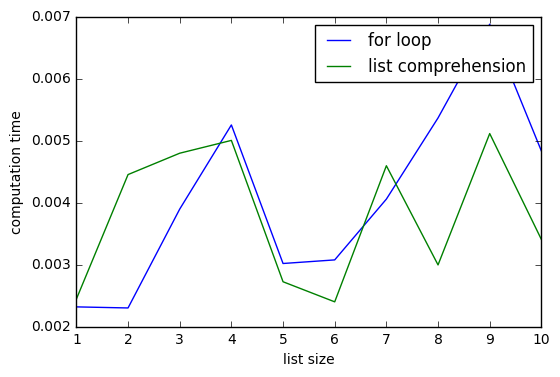

In [3]:
# plotting performance
plt.plot(range(1,11), finaltimes[0])
plt.plot(range(1,11), finaltimes[1])
plt.ylabel("computation time")
plt.xlabel("list size")
plt.legend(['for loop', 'list comprehension'], loc='upper right')  

## Exercise 2

1:Add a student
2:Add student grades
3:Print student report
4:Print score summary
5:Show grade distribution
6:Exit system
Please select from the menu:2

There are no students and grades to be summarized. Please pick another option.

1:Add a student
2:Add student grades
3:Print student report
4:Print score summary
5:Show grade distribution
6:Exit system
Please select from the menu:3

There are no students and grades to be summarized. Please pick another option.

1:Add a student
2:Add student grades
3:Print student report
4:Print score summary
5:Show grade distribution
6:Exit system
Please select from the menu:4

There are no students and grades to be summarized. Please pick another option.

1:Add a student
2:Add student grades
3:Print student report
4:Print score summary
5:Show grade distribution
6:Exit system
Please select from the menu:5

There are no students and grades to be summarized. Please pick another option.

1:Add a student
2:Add student grades
3:Print student report
4:Print 

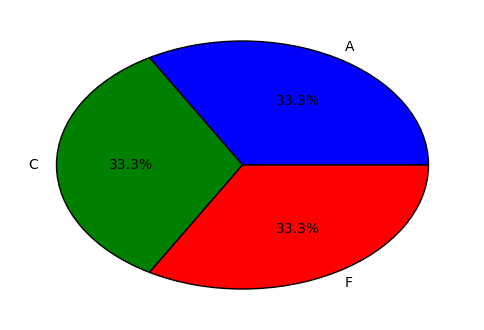

1:Add a student
2:Add student grades
3:Print student report
4:Print score summary
5:Show grade distribution
6:Exit system
Please select from the menu:6
Goodbye!


In [7]:
from statistics import mean, pstdev
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

# menu dictionary
menu = {"1":"Add a student",
        "2":"Add student grades",
        "3":"Print student report",
        "4":"Print score summary",
        "5":"Show grade distribution",
        "6":"Exit system"}

# empty dictionary to store information
allstudents={}   

while True: 
    for key in sorted(menu.keys()):
        print(key+":" + menu[key])
    
    selection=input("Please select from the menu:") 
    if selection =='1': 
        id=input("What is the student id?") 
        name=input("What is the student name?") 
        # all new students are initialized to 0 for all assignments and final grade of F
        allstudents[id]={'Name':None, 'Assignments':[0]*8,'Numscore':0, 'Letterscore':'F'}
        allstudents[id]['Name']=name
        print(allstudents)
    elif selection == '2':
        # dictionary empty continue onto new menu selection
        if len(allstudents)==0:
            print("\r\nThere are no students and grades to be summarized. Please pick another option.\r\n")
            continue  
        id=input("For what student id do you want to add/update grades for?") 
        #if id not in dictionary keys need to reinput for an existing id
        while id not in allstudents.keys():
            id=input("Invalid student id. Please enter an existing student id?")
        for i in range(8):
            if i==6 or i==7:
                score=float(input("What was the score on project"+str(i%6+1)+"?"))
                # takes care of invalid number input
                while score>100 or score<0 or not isinstance(score, float):
                    print("Invalid number entered. Please reenter.")
                    score=float(input("What was the score on project"+str(i%6+1)+"?"))
                allstudents[id]['Assignments'][i]=score
            else:
                score=float(input("What was the score on hw"+str(i+1)+"?"))
                # takes care of invalid number input
                while score>100 or score<0 or not isinstance(score, float):
                    print("Invalid number entered. Please reenter.")
                    score=float(input("What was the score on hw"+str(i+1)+"?"))
                allstudents[id]['Assignments'][i]=score
            # update numscore and letterscore variables after you add in hw and project grades
        finalscore=sum([0.1*j for j in allstudents[id]['Assignments'][0:6]]) + \
                           sum([0.2*j for j in allstudents[id]['Assignments'][6:]])
        allstudents[id]['Numscore']=finalscore       
        if finalscore>=90 and finalscore<=100:
            allstudents[id]['Letterscore']='A'
        elif finalscore>=80:
            allstudents[id]['Letterscore']='B'
        elif finalscore>=20:
            allstudents[id]['Letterscore']='C'
        elif finalscore>=10:
            allstudents[id]['Letterscore']='D'
        elif finalscore>=0:
            allstudents[id]['Letterscore']='F'
        print(allstudents)
    elif selection == '3':
        # dictionary empty continue onto new menu selection
        if len(allstudents)==0:
            print("\r\nThere are no students and grades to be summarized. Please pick another option.\r\n")
            continue      
        studrprt=[]
        for v in allstudents.values():
            name=v['Name']
            finalscore=v['Numscore']
            lettergrade=v['Letterscore']
            studrprt.append((name,finalscore,lettergrade))
        studrprt=sorted(studrprt, key=lambda x: x[0])
        print("\r\n")
        for tup in studrprt:
            print("Name:", tup[0], "Final score:", tup[1], "Final grade:", tup[2])
        print("\r\n")
    elif selection == '4': 
        # dictionary empty continue onto new menu selection
        if len(allstudents)==0:
            print("\r\nThere are no students and grades to be summarized. Please pick another option.\r\n")
            continue
        graderprt=[]
        for v in allstudents.values():
            finalscore=v['Numscore']
            graderprt.append(finalscore)    
        print("\r\nStudent count:", len(graderprt))
        print("Lowest final grade:", min(graderprt))   
        print("Highest final grade:",max(graderprt))
        print("Average final grade:", mean(graderprt))
        print("Standard deviation final grade:", pstdev(graderprt), "\r\n") 
    elif selection == '5': 
        # dictionary empty continue onto new menu selection
        if len(allstudents)==0:
            print("\r\nThere are no students and grades to be summarized. Please pick another option.\r\n")
            continue
        ltrrprt=[]
        for v in allstudents.values():
            lettergrade=v['Letterscore'] 
            ltrrprt.append(lettergrade)
        gradetable=pd.DataFrame(ltrrprt)
        gradetable.columns = ['lettergrade']
        rolluptable=gradetable.groupby(['lettergrade']).size()
        rolluptable= rolluptable.reset_index()
        rolluptable.columns = ['lettergrade','count']
        plt.pie(rolluptable['count'], labels=rolluptable['lettergrade'], autopct='%1.1f%%')
        plt.show()
    elif selection == '6': 
        print("Goodbye!")
        break
    else:
        print("\r\nInvalid selection. Please pick another option.\r\n")
        continue


## Exercise 3

In [4]:
# The cryptography package from Pypy is used to encode and decode text with a number of algorithms. Here we create a key through
# the Fernet algorithm passed into the copher_suite object that can be used to encode a string text and then decrypt the
# same text.

import cryptography

from cryptography.fernet import Fernet
key = Fernet.generate_key()
print("Key used to encode text")
print(key,"\r\n")
cipher_suite = Fernet(key)
cipher_text = cipher_suite.encrypt(b"A really secret message. Not for prying eyes.")
print("Encrypted message")
print(cipher_text,"\r\n")
plain_text = cipher_suite.decrypt(cipher_text)
print("Decrypted message")
print(plain_text)

Key used to encode text
b'YqpfMtuiGLh6gagWduvssGUDyy9zUKVqgFWfzN7uq1M=' 

Encrypted message
b'gAAAAABYd_Ta3msTQgOAnVxbsNxnXtSsvYJs8MK8RqSymLcmi0qSBIE2iic6G12BdinI8hGfM-Vm8vuV-hePGygb66IOyzbGulzPF8wDyxVXBRIPxGhn92L5vZOHfewzAQbptWHBCz1m' 

Decrypted message
b'A really secret message. Not for prying eyes.'
